In [66]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None
%matplotlib inline
import matplotlib
#matplotlib.use('agg')
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
from functools import reduce
import pickle as pkl

In [68]:
def decremover(dc):

    new_constituents=[]
    for constituent,decades in dc.items():
        if len(decades)==1:
            if 2000 in decades:
                new_constituents.append(constituent)
    return(new_constituents)

def tupleconverter(tup):
    dicter={}
    for word,decade in tup:
        #print(word,decade)
        if word in dicter:
            dicter[word].append(decade)
        else:
            dicter[word]=[]
            dicter[word].append(decade)
            
    #for word,decades in dicter.items():
        #print(word)
        #print(decades)
        #dicter[word]=Counter(decades)
        #print(dicter[word])
    return(dicter)

In [69]:
total_compounds_list=pkl.load( open("/data/dharp/compounding/datasets/total_compounds_list.pkl",'rb'))
modifiers, heads = zip(*total_compounds_list)
heads_list=list(set(heads))
modifiers_list=list(set(modifiers))

In [70]:
compounds=pd.read_csv("/data/dharp/compounding/datasets/phrases.csv")
compounds=compounds.query('decade != 2000')
compounds=compounds.reindex()
compounds=compounds.groupby(['modifier','head','context'])['count'].sum().to_frame()
compounds.reset_index(inplace=True)
compounds=compounds.loc[(compounds['modifier'].isin(modifiers_list)) &(compounds['head'].isin(heads_list))]
compounds

,modifier,head,context,count
1,a_n,a_n,professor_n,130
2,a_n,a_n,walter_n,65
3,a_n,aa_n,a_n,81
4,a_n,aa_n,aa_n,908
5,a_n,aaa_n,a_n,382
6,a_n,aaa_n,aaa_n,394
7,a_n,aaaaa_n,a_n,55
9,a_n,adam_n,avon_n,28
10,a_n,adam_n,corporation_n,100
11,a_n,adam_n,holbrook_n,72


In [71]:
constituents=pd.read_csv("/data/dharp/compounding/datasets/words.csv")
#constituents=constituents.query('decade != 2000')
constituents=constituents.reindex()
constituents_list=list(set(zip(constituents["word"],constituents["decade"])))
constituents_list=tupleconverter(constituents_list)
new_constituents=decremover(constituents_list)
constituents=constituents.loc[~constituents['word'].isin(new_constituents)]
constituents=constituents.query('decade != 2000')
constituents=constituents.groupby(['word','context'])['count'].sum().to_frame()
constituents.reset_index(inplace=True)
constituents

,word,context,count
0,a_n,a_a,13026
1,a_n,a_n,297659
2,a_n,aa_n,15368
3,a_n,aaa_n,10994
4,a_n,aachen_n,40
5,a_n,aaron_n,1173
6,a_n,ab_n,5900
7,a_n,aba_n,55
8,a_n,ababa_n,159
9,a_n,aback_r,652


In [72]:
modifiers=constituents.loc[constituents.word.isin(modifiers_list)]
modifiers.columns=['modifier','context','count']
modifiers

,modifier,context,count
0,a_n,a_a,13026
1,a_n,a_n,297659
2,a_n,aa_n,15368
3,a_n,aaa_n,10994
4,a_n,aachen_n,40
5,a_n,aaron_n,1173
6,a_n,ab_n,5900
7,a_n,aba_n,55
8,a_n,ababa_n,159
9,a_n,aback_r,652


In [74]:
heads=constituents.loc[constituents.word.isin(heads_list)]
heads.columns=['head','context','count']
heads

,head,context,count
0,a_n,a_a,13026
1,a_n,a_n,297659
2,a_n,aa_n,15368
3,a_n,aaa_n,10994
4,a_n,aachen_n,40
5,a_n,aaron_n,1173
6,a_n,ab_n,5900
7,a_n,aba_n,55
8,a_n,ababa_n,159
9,a_n,aback_r,652


In [75]:
XY=compounds.groupby(['modifier','head'])['count'].sum().to_frame()
XY.columns=['a']
X_star=compounds.groupby(['modifier'])['count'].sum().to_frame()
X_star.columns=['x_star']
Y_star=compounds.groupby(['head'])['count'].sum().to_frame()
Y_star.columns=['star_y']
merge1=pd.merge(XY.reset_index(),X_star.reset_index(),on=['modifier'])
information_feat=pd.merge(merge1,Y_star.reset_index(),on=['head'])
information_feat['b']=information_feat['x_star']-information_feat['a']
information_feat['c']=information_feat['star_y']-information_feat['a']
information_feat['N']=np.sum(compounds['count'])
#information_feat=pd.merge(information_feat,compound_decade_counts.reset_index(),on=['decade'])
information_feat['d']=information_feat['N']-(information_feat['a']+information_feat['b']+information_feat['c'])
information_feat['x_bar_star']=information_feat['N']-information_feat['x_star']
information_feat['star_y_bar']=information_feat['N']-information_feat['star_y']
#information_feat['LR']=-2*np.sum(information_feat['a']*np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y'])))
information_feat.set_index(['modifier','head'],inplace=True)
information_feat.replace(0,0.001,inplace=True)
information_feat['log_ratio']=2*(information_feat['a']*np.log((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))+\
information_feat['b']*np.log((information_feat['b']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y_bar']))+\
information_feat['c']*np.log((information_feat['c']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y']))+\
information_feat['d']*np.log((information_feat['d']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y_bar'])))
information_feat['ppmi']=np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))
information_feat['local_mi']=information_feat['a']*information_feat['ppmi']
information_feat.ppmi.loc[information_feat.ppmi<=0]=0
information_feat.drop(['a','x_star','star_y','b','c','d','N','d','x_bar_star','star_y_bar'],axis=1,inplace=True)
information_feat

,,log_ratio,ppmi,local_mi
modifier,head,,,
a_n,a_n,779.526,0.000,-423.235
aa_n,a_n,63261.390,7.063,56401.884
aaa_n,a_n,41785.635,7.297,36895.194
aaaa_n,a_n,2410.478,9.799,1871.602
aaaaa_n,a_n,880.922,10.249,635.465
ab_n,a_n,4143.340,5.642,3960.896
abc_n,a_n,121.620,1.768,206.840
abutment_n,a_n,90.579,2.830,116.045
ac_n,a_n,39.684,1.150,92.000


In [77]:
modifier_denom=modifiers.groupby(['modifier'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
modifier_denom.columns=['modifier_denom']
modifier_denom

,modifier_denom
modifier,
a_n,169223050.053
aa_n,81618.939
aaa_n,45933.658
aaaa_n,595.062
aaaaa_n,179.000
aaai_n,2458.732
aab_n,231.236
aac_n,303.701
aaf_n,1265.836


In [78]:
head_denom=heads.groupby(['head'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
head_denom.columns=['head_denom']
head_denom

,head_denom
head,
a_n,169223050.053
aa_n,81618.939
aaa_n,45933.658
aaaaa_n,179.000
aaai_n,2458.732
aaddison_n,56.036
aah_n,887.930
aandsliv_n,95.000
aap_n,527.638


In [79]:
compound_denom=compounds.groupby(['modifier','head'])['count'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
compound_denom.columns=['compound_denom']
compound_denom

compound_denom
modifier        head                            
a_n             a_n                      145.344
                aa_n                     911.606
                aaa_n                    548.780
                aaaaa_n                   55.000
                adam_n                   161.146
                addison_n                371.938
                administration_n          23.000
                albert_n                  55.154
                american_n               805.378
                anti_n                   169.000
                appendix_n               415.861
                aqueduct_n                 5.196
                archive_n                271.625
                area_n                   241.220
                arginine_n               176.165
                asset_n                  164.131
                atom_n                    87.727
                b_n                   108234.711
                baby_n                    82.024
                balance_n                 67.082
                ballantine_n              21.213
                ballet_n                  85.000
                band_n                   153.010
                bank_n                   445.915
                banking_n                127.279
                baseball_n                63.640
                basic_n                  304.266
                battlefield_n             54.000
                bb_n                     165.173
                bed_n                      1.414
...                                          ...
zurich_n        federal_n                115.603
                general_n                357.796
                government_n             152.607
                institute_n               98.000
                james_n                  104.862
                market_n                  53.000
                medical_n                153.834
                opera_n                   44.000
                peasantry_n              105.095
                polytechnic_n            195.236
                research_n               743.734
                school_n                 167.278
                seminar_n                777.564
                speech_n                  43.000
                stock_n                  431.000
                swiss_n                   49.497
                translation_n             39.000
                university_n             327.426
                wilhelm_n                 48.000
zwemmer_n       gallery_n                 93.215
zwinglische_n   reformation_n             87.000
zwitterion_n    form_n                    40.000
                intermediate_n           146.969
                mechanism_n              120.000
                route_n                  142.070
zygapophyseal_n joint_n                  197.757
zygote_n        nucleus_n                 42.000
                result_n                  51.088
zygotene_n      stage_n                   94.000
zylobalsamum_n  process_n                 46.669

[1083684 rows x 1 columns]

In [80]:
mod_cols=modifiers.columns.tolist()
mod_cols[-1]="mod_count"
modifiers.columns=mod_cols
#compounds.drop(['comp_count'],axis=1,inplace=True)
comp_cols=compounds.columns.tolist()
comp_cols[-1]="comp_count"
compounds.columns=comp_cols
compound_modifier_sim=pd.merge(compounds,modifiers,on=["modifier","context"])
compound_modifier_sim['numerator']=compound_modifier_sim['comp_count']*compound_modifier_sim['mod_count']
compound_modifier_sim=compound_modifier_sim.groupby(['modifier','head'])['numerator'].sum().to_frame()
compound_modifier_sim=pd.merge(compound_modifier_sim.reset_index(),compound_denom.reset_index(),on=["modifier","head"])
compound_modifier_sim=pd.merge(compound_modifier_sim,modifier_denom.reset_index(),on=['modifier'])
compound_modifier_sim['sim_with_modifier']=compound_modifier_sim['numerator']/(compound_modifier_sim['compound_denom']*compound_modifier_sim['modifier_denom'])
compound_modifier_sim.set_index(['modifier','head'],inplace=True)
compound_modifier_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
compound_modifier_sim

modifier_denom  sim_with_modifier
modifier        head                                               
a_n             a_n                169223050.053              0.002
                aa_n               169223050.053              0.000
                aaa_n              169223050.053              0.001
                aaaaa_n            169223050.053              0.002
                adam_n             169223050.053              0.004
                addison_n          169223050.053              0.000
                administration_n   169223050.053              0.000
                albert_n           169223050.053              0.001
                american_n         169223050.053              0.002
                anti_n             169223050.053              0.009
                appendix_n         169223050.053              0.006
                aqueduct_n         169223050.053              0.000
                archive_n          169223050.053              0.000
                area_n             169223050.053              0.008
                arginine_n         169223050.053              0.000
                asset_n            169223050.053              0.006
                atom_n             169223050.053              0.813
                b_n                169223050.053              0.023
                baby_n             169223050.053              0.001
                balance_n          169223050.053              0.004
                ballantine_n       169223050.053              0.014
                ballet_n           169223050.053              0.000
                band_n             169223050.053              0.150
                bank_n             169223050.053              0.008
                banking_n          169223050.053              0.006
                baseball_n         169223050.053              0.000
                basic_n            169223050.053              0.004
                battlefield_n      169223050.053              0.000
                bb_n               169223050.053              0.002
                bed_n              169223050.053              0.000
...                                          ...                ...
zurich_n        conference_n           24290.619              0.177
                congress_n             24290.619              0.003
                federal_n              24290.619              0.137
                general_n              24290.619              0.007
                government_n           24290.619              0.007
                institute_n            24290.619              0.110
                james_n                24290.619              0.007
                market_n               24290.619              0.128
                medical_n              24290.619              0.716
                opera_n                24290.619              0.004
                peasantry_n            24290.619              0.004
                polytechnic_n          24290.619              0.097
                research_n             24290.619              0.048
                school_n               24290.619              0.019
                seminar_n              24290.619              0.028
                speech_n               24290.619              0.002
                stock_n                24290.619              0.035
                swiss_n                24290.619              0.075
                university_n           24290.619              0.017
                wilhelm_n              24290.619              0.003
zwemmer_n       gallery_n                294.459              0.074
zwinglische_n   reformation_n            209.881              0.415
zwitterion_n    intermediate_n           784.151              0.250
                mechanism_n              784.151              0.153
                route_n                  784.151              0.272
zygapophyseal_n joint_n                  273.668              0.561
zygote_n        nucleu

In [81]:
compound_modifier_sim.sim_with_modifier.describe()

count   982448.000
mean         0.139
std          0.215
min          0.000
25%          0.005
50%          0.033
75%          0.175
max          1.000
Name: sim_with_modifier, dtype: float64

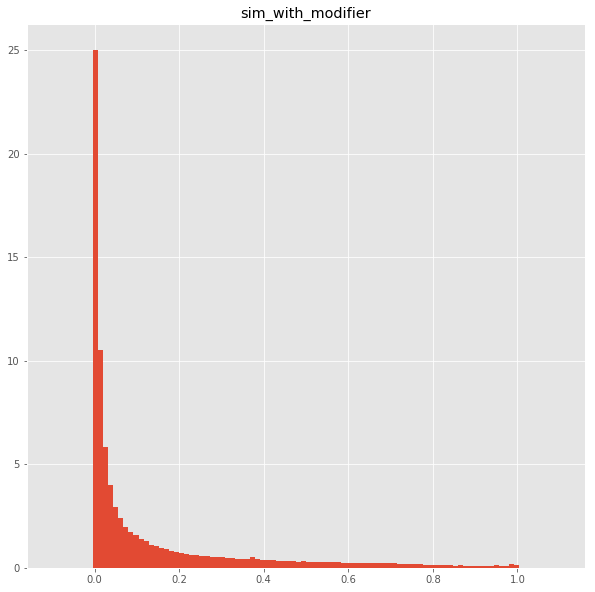

In [82]:
_=compound_modifier_sim.hist(column ='sim_with_modifier', figsize=(10, 10),bins=100,sharex=True,sharey=True,density=True,range=(-0.1,1.1))

In [83]:
head_cols=heads.columns.tolist()
head_cols[-1]="head_count"
heads.columns=head_cols

compound_head_sim=pd.merge(compounds,heads,on=["head","context"])
compound_head_sim['numerator']=compound_head_sim['comp_count']*compound_head_sim['head_count']
compound_head_sim=compound_head_sim.groupby(['modifier','head'])['numerator'].sum().to_frame()
compound_head_sim=pd.merge(compound_head_sim.reset_index(),compound_denom.reset_index(),on=["modifier","head"])
compound_head_sim=pd.merge(compound_head_sim,head_denom.reset_index(),on=['head'])
compound_head_sim['sim_with_head']=compound_head_sim['numerator']/(compound_head_sim['compound_denom']*compound_head_sim['head_denom'])
compound_head_sim.set_index(['modifier','head'],inplace=True)
compound_head_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
compound_head_sim

,,head_denom,sim_with_head
modifier,head,,
a_n,a_n,169223050.053,0.002
aa_n,a_n,169223050.053,0.002
aaa_n,a_n,169223050.053,0.002
aaaa_n,a_n,169223050.053,0.002
aaaaa_n,a_n,169223050.053,0.002
ab_n,a_n,169223050.053,0.008
abc_n,a_n,169223050.053,0.007
abutment_n,a_n,169223050.053,0.002
ac_n,a_n,169223050.053,0.002


In [84]:
compound_head_sim.sim_with_head.describe()

count   1062719.000
mean          0.124
std           0.201
min           0.000
25%           0.004
50%           0.027
75%           0.147
max           1.000
Name: sim_with_head, dtype: float64

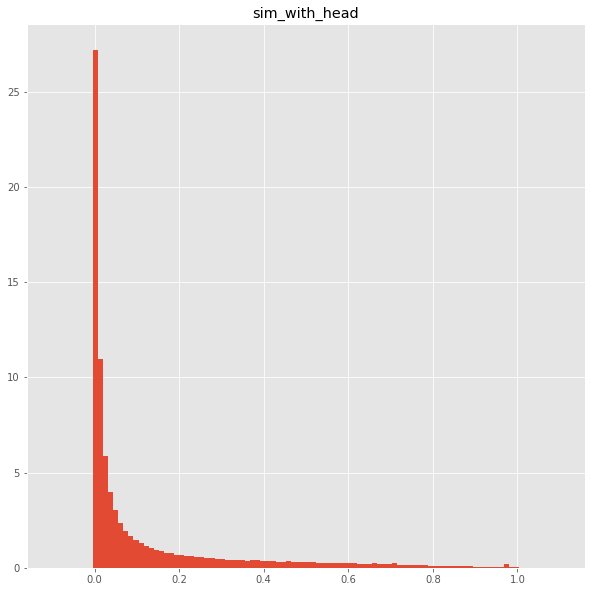

In [85]:
_=compound_head_sim.hist(column ='sim_with_head', figsize=(10, 10),bins=100,sharex=True,sharey=True,density=True,range=(-0.1,1.1))

In [86]:
constituent_sim=pd.merge(heads,compounds,on=["head","context"])
#constituent_sim.drop('comp_count',axis=1,inplace=True)
constituent_sim=pd.merge(constituent_sim,modifiers,on=["modifier","context"])
constituent_sim['numerator']=constituent_sim['head_count']*constituent_sim['mod_count']
constituent_sim=constituent_sim.groupby(['modifier','head'])['numerator'].sum().to_frame()
constituent_sim=pd.merge(constituent_sim.reset_index(),head_denom.reset_index(),on=["head"])
constituent_sim=pd.merge(constituent_sim,modifier_denom.reset_index(),on=["modifier"])
constituent_sim['sim_bw_constituents']=constituent_sim['numerator']/(constituent_sim['head_denom']*constituent_sim['modifier_denom'])
constituent_sim.set_index(['modifier','head'],inplace=True)
constituent_sim.drop(['numerator','modifier_denom','head_denom'],axis=1,inplace=True)
constituent_sim

sim_bw_constituents
modifier          head                                   
a_n               a_n                               0.000
                  aa_n                              0.000
                  aaa_n                             0.000
                  aaaaa_n                           0.002
                  adam_n                            0.000
                  addison_n                         0.000
                  administration_n                  0.000
                  albert_n                          0.000
                  american_n                        0.000
                  anti_n                            0.000
                  appendix_n                        0.002
                  aqueduct_n                        0.000
                  archive_n                         0.000
                  area_n                            0.000
                  arginine_n                        0.000
                  asset_n                           0.000
                  atom_n                            0.558
                  b_n                               0.707
                  baby_n                            0.000
                  balance_n                         0.001
                  ballantine_n                      0.012
                  ballet_n                          0.000
                  band_n                            0.605
                  bank_n                            0.000
                  banking_n                         0.000
                  baseball_n                        0.000
                  basic_n                           0.000
                  battlefield_n                     0.000
                  bb_n                              0.000
                  bed_n                             0.000
...                                                   ...
uniformly_n       magnetized_n                      0.093
univer_n          sity_n                            0.469
unruptured_n      intracranial_n                    0.007
upheaval_n        autocratic_n                      0.015
uptime_n          srtt_n                            0.687
urbs_n            orrea_n                           0.495
ustilago_n        zeae_n                            0.937
valvulae_n        conniventes_n                     0.090
verdens_n         ende_n                            0.022
varus_n           gonarthrosis_n                    0.016
vegetatively_n    propagated_n                      0.019
velitrae_n        threw_n                           0.051
velum_n           interpositum_n                    0.032
venerabilis_n     baedae_n                          0.872
venovenous_n      hemofiltration_n                  0.465
ventralis_n       lateralis_n                       0.004
                  posterolateralis_n                0.047
ventrolateralis_n thalamotomy_n                     0.271
vertebra_n        prominens_n                       0.002
vespertilio_n     horribilis_n                      0.493
vestigia_n        communia_n                        0.351
vetements_n       ondoyants_n                       0.898
vg_n              wort_n                            0.005
viburnum_n        prunifolium_n                     0.350
waties_n          waring_n                          0.010
voir_n            dire_n                            0.026
vraies_n          faiblesses_n                      0.577
windrow_n         filmset_n                         0.261
wintres_n         weders_n                          0.930
yom_n             kippur_n                          0.290

[962773 rows x 1 columns]

In [87]:
constituent_sim.sim_bw_constituents.describe()

count   962773.000
mean         0.072
std          0.167
min          0.000
25%          0.000
50%          0.001
75%          0.017
max          1.000
Name: sim_bw_constituents, dtype: float64

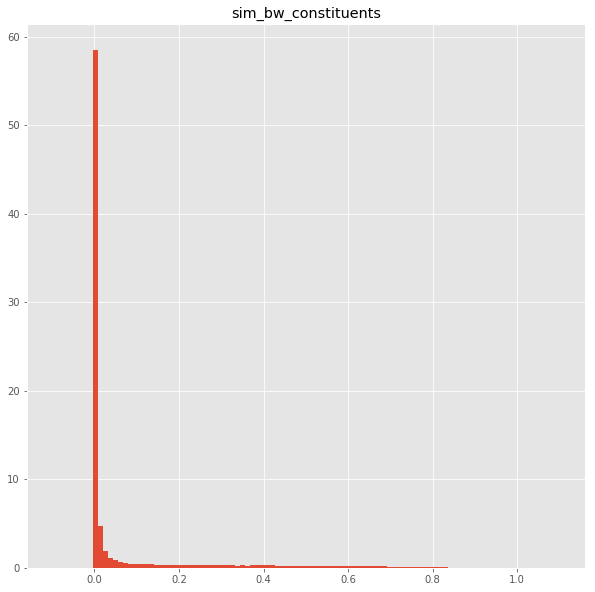

In [88]:
_=constituent_sim.hist(column ='sim_bw_constituents', figsize=(10, 10),bins=100,sharex=True,sharey=True,density=True,range=(-0.1,1.1))

In [89]:
dfs = [constituent_sim.reset_index(), compound_head_sim.reset_index(), compound_modifier_sim.reset_index(), information_feat.reset_index()]
compounds_final = reduce(lambda left,right: pd.merge(left,right,on=['modifier','head']), dfs)
compounds_final.drop(['head_denom','modifier_denom'],axis=1,inplace=True)
compounds_final.set_index(['modifier','head'],inplace=True)
compounds_final.fillna(0,inplace=True)
compounds_final -= compounds_final.min()
compounds_final /= compounds_final.max()

compounds_final

sim_bw_constituents  sim_with_head  \
modifier          head                                                     
a_n               a_n                               0.000          0.002   
                  aa_n                              0.000          0.991   
                  aaa_n                             0.000          0.837   
                  aaaaa_n                           0.002          1.000   
                  adam_n                            0.000          0.002   
                  addison_n                         0.000          0.901   
                  administration_n                  0.000          0.000   
                  albert_n                          0.000          0.000   
                  american_n                        0.000          0.010   
                  anti_n                            0.000          0.017   
                  appendix_n                        0.002          0.253   
                  aqueduct_n                        0.000          0.000   
                  archive_n                         0.000          0.071   
                  area_n                            0.000          0.018   
                  arginine_n                        0.000          0.035   
                  asset_n                           0.000          0.036   
                  atom_n                            0.558          0.573   
                  b_n                               0.707          0.595   
                  baby_n                            0.000          0.007   
                  balance_n                         0.001          0.413   
                  ballantine_n                      0.012          0.715   
                  ballet_n                          0.000          0.004   
                  band_n                            0.605          0.184   
                  bank_n                            0.000          0.039   
                  banking_n                         0.000          0.024   
                  baseball_n                        0.000          0.025   
                  basic_n                           0.000          0.004   
                  battlefield_n                     0.000          0.008   
                  bb_n                              0.000          0.056   
                  bed_n                             0.000          0.000   
...                                                   ...            ...   
uniformly_n       magnetized_n                      0.093          0.336   
univer_n          sity_n                            0.469          0.328   
unruptured_n      intracranial_n                    0.007          0.052   
upheaval_n        autocratic_n                      0.015          0.160   
uptime_n          srtt_n                            0.687          0.945   
urbs_n            orrea_n                           0.495          0.870   
ustilago_n        zeae_n                            0.937          1.000   
valvulae_n        conniventes_n                     0.090          0.735   
verdens_n         ende_n                            0.022          0.022   
varus_n           gonarthrosis_n                    0.016          0.640   
vegetatively_n    propagated_n                      0.019          0.026   
velitrae_n        threw_n                           0.051          0.066   
velum_n           interpositum_n                    0.032          0.385   
venerabilis_n     baedae_n                          0.872          0.872   
venovenous_n      hemofiltration_n                  0.465          0.465   
ventralis_n       lateralis_n                       0.004          0.108   
                  posterolateralis_n                0.047          0.263   
ventrolateralis_n thalamotomy_n                     0.271          0.328   
vertebra_n        prominens_n                       0.002          0.184   
vespertilio_n     horribilis_n                      0.493          0.592   
vestigia_n

In [90]:
compounds_final.to_csv("/data/dharp/compounding/datasets/DFM_Non_Contextual_Non_Temporal.csv",sep='\t')